# ****Vinho Verde - Classificação de Variedade****

No presente trabalho pretendemos criar uma rede neural capaz de classificar amostras de vinho verde tinto (Red) e vinho verde branco (White). O Wine dataset é um dataset composto por 6.497 amostras de vinhos (1.599 - Red e 4.898 - White) da região portuguesa do Minho. Por sua vez, cada uma das observações do dataset é composta por 11 variáveis correspondentes às propriedades Fisico-Químicas do vinho.

O nosso principal objetivo é obter um modelo capaz de generalizar a função aprendida para outros exemplos não observados antes. Para tal, pretendemos que o nosso modelo consiga mapear corretamente os dados de treino e consiga atingir poder estatístico, isto é, obter um modelo capaz de superar a baseline de previsão de 75% (frequência relativa do vinho verde branco).

## **1 -Importação e Tratamento Inicial dos dados**
- Importar o DataSet,
- Efetuar uma Análise inicial (nome das colunas, inputs, outputs, dimensão...)
- Verificar se existem missing values;
- Verificar se existem observações duplicadas;
- Converter o output - "Type" em binário.

In [2]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt

### 1.1 - Importar o Dataset

In [3]:
file = r'C:\Users\nunov\wine.csv'
wine = pd.read_csv(file,delimiter=';')


In [4]:
wine

,Type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,Red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,Red,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,Red,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,Red,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,Red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,White,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
6493,White,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
6494,White,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
6495,White,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [5]:
wine.shape

(6497, 13)

### 1.2 - Missing Values

In [6]:
# Check missing values
print(wine.isna().sum()+wine.isnull().sum())

Type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


### 1.3 - Valores duplicados

In [7]:
# verificar valores duplicados
Duplicated_inputs = wine.duplicated()
print('Duplicated inputs:', Duplicated_inputs.sum())

Duplicated inputs: 1177


In [8]:
wine = wine.drop_duplicates()

In [9]:
wine.shape

(5320, 13)

### 1.4 - Converter o Output - "Type" em binário

In [10]:
binary_cols = pd.get_dummies(wine['Type'])
wine = pd.concat([wine, binary_cols], axis=1)
wine

,Type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Red,White
0,Red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1,0
1,Red,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1,0
2,Red,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,1,0
3,Red,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1,0
5,Red,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,White,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0,1
6493,White,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0,1
6494,White,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0,1
6495,White,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,0,1


In [11]:
# Eliminar a coluna original "Type" e substituir a coluna "Red" por "Type". 
wine = wine.drop(['Type', 'White','quality'], axis=1)
wine = wine.rename(columns={'Red': 'Type'})
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,1
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,1
...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,0
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,0
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,0
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,0


## **2 - Preparação dos Dados**
 - Dividir o dataset inputs e outputs (x,y);
 - Dividir o dataset em dados de treino e teste;
 - Normalizar os inputs.

### 2.1 - Dividir o Dataset

In [12]:
# Dividir o modelo - 80% treino /20% teste
x = wine.drop('Type', axis=1)
y = wine['Type']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [13]:

print("Training data shape:", x_train.shape)
print("Training labels shape:", y_train.shape)
print("Testing data shape:", x_test.shape)
print("Testing labels shape:", y_test.shape)

Training data shape: (4256, 11)
Training labels shape: (4256,)
Testing data shape: (1064, 11)
Testing labels shape: (1064,)


### 2.2  - Normalizar os dados

Subtraindo pela média e dividindo cada valor pelo respetivo desvio padrão.

In [14]:
#Normalizar os dados
x_mean = x.mean(axis=0)
x_std = x.std(axis=0)

def normalize(data):
    data -= x_mean
    data /= x_std

normalize(x_train)
normalize(x_test)

## **3 - Definir o Modelo**
 - Holdout Validation;
 - Desenvolvimento do modelo;
 - Adição de complexidade - overfitting; 
 - Tuning dos híper-parametros;
 - Resultados.
 

In [15]:
# Definir o modelo
from keras import models
from keras import layers
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(x_train.shape[1],))), Dropout(0,2) 
#model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer= 'rmsprop',
             loss = 'binary_crossentropy',
             metrics=['accuracy'])

### 3.1 - Validar o Modelo - Holdout Validation

Consiste na separação, a priori, dos dados em sets de treino e teste. O set de treino é posteriormente separado em dois sets, um especificamente para validação, onde os híper parametros do modelo serão otimizados

In [16]:
x_validation = x_train[:2000] #Primeiras 2k Observações
partial_x_train = x_train[2000:] #Restantes = 4256-2000
y_validation = y_train[:2000]
partial_y_train = y_train[2000:]


In [17]:
print("Valitadion data shape:", x_validation.shape)
print("Valitadion labels shape:", y_validation.shape)
print("Partial data shape:", partial_x_train.shape)
print("Partial labels shape:", partial_y_train.shape)

Valitadion data shape: (2000, 11)
Valitadion labels shape: (2000,)
Partial data shape: (2256, 11)
Partial labels shape: (2256,)


Vamos testar e otimizar o modelo, através da divisão feita nos dados de treino (partial train, validation) e da alteração dos híper parametros.

In [18]:
historic = model.fit(partial_x_train
                    ,partial_y_train
                    ,epochs = 20
                    ,batch_size=100
                    ,validation_data = (x_validation, y_validation))

Epoch 1/20
23/23 [==============================] - 1s 13ms/step - loss: 0.4603 - accuracy: 0.9184 - val_loss: 0.3778 - val_accuracy: 0.9670
Epoch 2/20
23/23 [==============================] - 0s 3ms/step - loss: 0.3240 - accuracy: 0.9725 - val_loss: 0.2751 - val_accuracy: 0.9820
Epoch 3/20
23/23 [==============================] - 0s 4ms/step - loss: 0.2374 - accuracy: 0.9858 - val_loss: 0.2015 - val_accuracy: 0.9850
Epoch 4/20
23/23 [==============================] - 0s 3ms/step - loss: 0.1764 - accuracy: 0.9894 - val_loss: 0.1505 - val_accuracy: 0.9875
Epoch 5/20
23/23 [==============================] - 0s 4ms/step - loss: 0.1337 - accuracy: 0.9894 - val_loss: 0.1140 - val_accuracy: 0.9890
Epoch 6/20
23/23 [==============================] - 0s 6ms/step - loss: 0.1038 - accuracy: 0.9898 - val_loss: 0.0889 - val_accuracy: 0.9900
Epoch 7/20
23/23 [==============================] - 0s 3ms/step - loss: 0.0832 - accuracy: 0.9902 - val_loss: 0.0717 - val_accuracy: 0.9905
Epoch 8/20
23/23 [=

Plots do Modelo de Validação - "Loss" e "Accuracy"

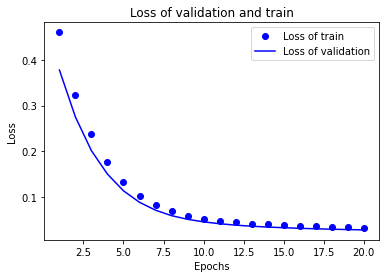

In [19]:
# loss
dic_history = historic.history
dic_history.keys()
loss = dic_history['loss']
val_loss = dic_history['val_loss']
epochs = range(1, len(val_loss)+1)

plt.plot(epochs, loss, 'bo', label='Loss of train')
plt.plot(epochs, val_loss, 'b', label='Loss of validation')
plt.title('Loss of validation and train')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

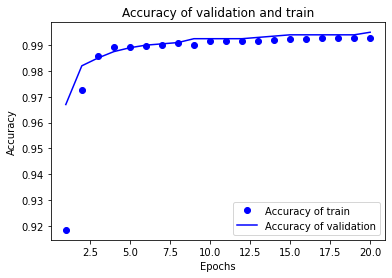

In [20]:
# Accuracy
accuracy = dic_history['accuracy']
val_accuracy = dic_history['val_accuracy']

epochs = range(1, len(val_loss)+1)

plt.plot(epochs, accuracy, 'bo', label='Accuracy of train')
plt.plot(epochs, val_accuracy, 'b', label='Accuracy of validation')
plt.title('Accuracy of validation and train')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

### 3.2 - Criar o Modelo Final

In [21]:
historic = model.fit(x_train
                    ,y_train
                    ,epochs = 20
                    ,batch_size = 100
                    ,validation_data = (x_test, y_test))

Epoch 1/20
43/43 [==============================] - 0s 7ms/step - loss: 0.0307 - accuracy: 0.9939 - val_loss: 0.0219 - val_accuracy: 0.9944
Epoch 2/20
43/43 [==============================] - 0s 3ms/step - loss: 0.0293 - accuracy: 0.9946 - val_loss: 0.0207 - val_accuracy: 0.9944
Epoch 3/20
43/43 [==============================] - 0s 2ms/step - loss: 0.0282 - accuracy: 0.9946 - val_loss: 0.0194 - val_accuracy: 0.9934
Epoch 4/20
43/43 [==============================] - 0s 2ms/step - loss: 0.0274 - accuracy: 0.9948 - val_loss: 0.0186 - val_accuracy: 0.9934
Epoch 5/20
43/43 [==============================] - 0s 2ms/step - loss: 0.0266 - accuracy: 0.9948 - val_loss: 0.0180 - val_accuracy: 0.9944
Epoch 6/20
43/43 [==============================] - 0s 2ms/step - loss: 0.0259 - accuracy: 0.9946 - val_loss: 0.0174 - val_accuracy: 0.9944
Epoch 7/20
43/43 [==============================] - 0s 2ms/step - loss: 0.0252 - accuracy: 0.9953 - val_loss: 0.0166 - val_accuracy: 0.9944
Epoch 8/20
43/43 [==

### 3.3 - Resultados

In [22]:
results = model.evaluate(x_test, y_test)
results

34/34 [==============================] - 0s 2ms/step - loss: 0.0128 - accuracy: 0.9962


[0.012764856219291687, 0.9962406158447266]

## **4 - Aplicação do Modelo**

Função que devolve o tipo de vinho, com base nas suas propriedades Físico-Químicas

In [23]:
x_mean_array = np.array(x_mean).reshape(1, 11)
x_std_array = np.array(x_std).reshape(1, 11)

def previsao(vinho):
    vinho = np.array(vinho).reshape(1, 11)
    vinho -= x_mean_array
    vinho /= x_std_array
    if float(model.predict((vinho)))<0.5: #0.5 Threshold
        print("Output: White Vinho Verde")
    else:
        print("Output: Red Vinho Verde")

In [24]:
test_wine_0 = [7.3,0.7,0,1.9,0.076,11,34,0.9978,3.51,0.56,9.4] #Red
test_wine_1 = [8.88,0.22,0.48,1.8,0.077,29,60,0.9968,3.39,0.53,9.4] #Red
test_wine_2 = [6.5,0.33,0.38,8.3,0.048,68,174,0.99492,3.14,0.5,9.6] #White
test_wine_3 = [5.9,0.32,0.26,1.5,0.057,17,141,0.9917,3.24,0.36,10.7] #White

In [28]:
previsao(test_wine_2)


1/1 [==============================] - 0s 34ms/step
Output: White Vinho Verde
